In [2]:
import pandas as pd
import numpy as np
import cv2
from random import randint
from matplotlib import pyplot as plt


## Читаем все данные из Csv файла 

In [3]:
#1
df = pd.read_csv('dataset.csv', delimiter=';')
print("DataFrame:")
df

DataFrame:


,Absolute path,Class
0,C:\Users\79093\Desktop\Application progra\pars...,DogIT
1,C:\Users\79093\Desktop\Application progra\pars...,DogIT
2,C:\Users\79093\Desktop\Application progra\pars...,DogIT
3,C:\Users\79093\Desktop\Application progra\pars...,DogIT
4,C:\Users\79093\Desktop\Application progra\pars...,DogIT
...,...,...
2195,C:\Users\79093\Desktop\Application progra\pars...,CatIT
2196,C:\Users\79093\Desktop\Application progra\pars...,CatIT
2197,C:\Users\79093\Desktop\Application progra\pars...,CatIT
2198,C:\Users\79093\Desktop\Application progra\pars...,CatIT


## Именнуем колонки по тз

In [4]:
#2
df = df.rename(columns={"Absolute path": "absolute_path", "Class": "class_"})
print("Именнуем колонки в соответствие с заданием")
df

Именнуем колонки в соответствие с заданием


,absolute_path,class_
0,C:\Users\79093\Desktop\Application progra\pars...,DogIT
1,C:\Users\79093\Desktop\Application progra\pars...,DogIT
2,C:\Users\79093\Desktop\Application progra\pars...,DogIT
3,C:\Users\79093\Desktop\Application progra\pars...,DogIT
4,C:\Users\79093\Desktop\Application progra\pars...,DogIT
...,...,...
2195,C:\Users\79093\Desktop\Application progra\pars...,CatIT
2196,C:\Users\79093\Desktop\Application progra\pars...,CatIT
2197,C:\Users\79093\Desktop\Application progra\pars...,CatIT
2198,C:\Users\79093\Desktop\Application progra\pars...,CatIT


## Цифровая метка 

In [5]:
df['tags']=df['class_'].apply(lambda x: '0' if x == 'DogIT' else '1')
df

,absolute_path,class_,tags
0,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0
1,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0
2,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0
3,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0
4,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0
...,...,...,...
2195,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1
2196,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1
2197,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1
2198,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1


## Высота, ширина, глубина изображения 

In [6]:

height = []
width = []
channels = []
sizel = []
absolute_path_list = df.absolute_path.tolist()
for row in absolute_path_list:
    image = cv2.imread(row)
    height.append(image.shape[0])
    width.append(image.shape[1])
    channels.append(image.shape[2])
    sizel.append(image.size)
df["height"] = height
df["width"] = width
df["channels"] = channels
df["size"] = sizel
df


,absolute_path,class_,tags,height,width,channels,size
0,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
1,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,427,3,409920
2,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,480,3,460800
3,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,389,3,373440
4,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,240,3,230400
...,...,...,...,...,...,...,...
2195,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,270,480,3,388800
2196,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,346,3,332160
2197,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,300,480,3,432000
2198,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,434,3,416640


## Cтатистика

In [7]:
df[["height", "width", "channels"]].describe()

,height,width,channels
count,2200.000000,2200.000000,2200.0
mean,310.423182,442.525455,3.0
std,15.024839,64.635187,0.0
min,241.000000,180.000000,3.0
25%,300.000000,427.000000,3.0
50%,320.000000,480.000000,3.0
75%,320.000000,480.000000,3.0
max,320.000000,480.000000,3.0


## Функция для сортировки по тегам

In [8]:
def tag_sort(df, tag):
    return df[df.tags == tag]


#### вызов для тега 0

In [9]:
df_dog = tag_sort(df, "0")

df_dog

,absolute_path,class_,tags,height,width,channels,size
0,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
1,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,427,3,409920
2,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,480,3,460800
3,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,389,3,373440
4,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,240,3,230400
...,...,...,...,...,...,...,...
1095,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,456,3,437760
1096,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,480,3,460800
1097,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,320,320,3,307200
1098,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,300,480,3,432000


#### вызов для тега 1 

In [10]:
df_cat = tag_sort(df, "1")
df_cat

,absolute_path,class_,tags,height,width,channels,size
1100,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,448,3,430080
1101,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,270,480,3,388800
1102,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,480,3,460800
1103,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,480,3,460800
1104,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,252,3,241920
...,...,...,...,...,...,...,...
2195,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,270,480,3,388800
2196,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,346,3,332160
2197,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,300,480,3,432000
2198,C:\Users\79093\Desktop\Application progra\pars...,CatIT,1,320,434,3,416640


## Пункт 7

In [11]:
def sort(df, tag: int, max_height: int, max_width: int):
    return df[((df.tags == f'{tag}') & (df.height < max_height) & (df.width < max_width))]


In [12]:
df_max = sort(df, 0, 300, 500)
df_max


,absolute_path,class_,tags,height,width,channels,size
0,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
27,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,290,480,3,417600
63,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
74,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
97,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
...,...,...,...,...,...,...,...
1056,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
1065,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
1079,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,270,480,3,388800
1084,C:\Users\79093\Desktop\Application progra\pars...,DogIT,0,282,480,3,406080



## Пункт 8 

In [13]:
df2 = df.groupby(['tags']).agg({"size": ["max", "mean", "min"]}).reset_index()
print("Группировка датафрейма")
df2

Группировка датафрейма


tags    size                       
           max           mean     min
0    0  460800  410403.927273  172800
1    1  460800  411663.709091  172800

## Создаем гистограмму 

In [114]:
def create_histograma(dataframe, class_type):

    print('class_ = ', class_type)
    if (class_type == 0):
        imgID = randint(0, 1099)
    elif (class_type == 1):
        imgID = randint(1100, 2199)
    image_way = tag_sort(dataframe, str(class_type))[ 'absolute_path'].loc[imgID]

    image = cv2.imread(image_way)

    cv2.imshow(f'img num {imgID}', image)
    plt.imshow(image)
    plt.show()
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])

    plt.show()

## ВЫвод рандомной гистограмы

class_ =  1


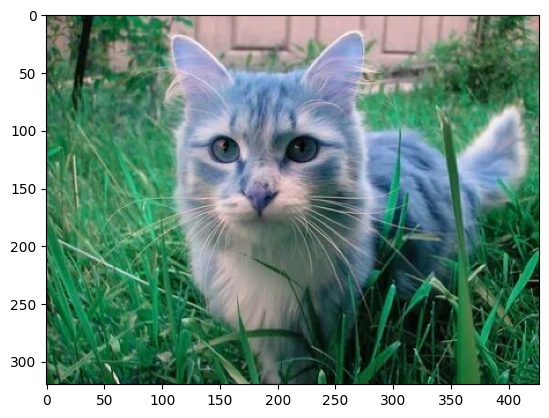

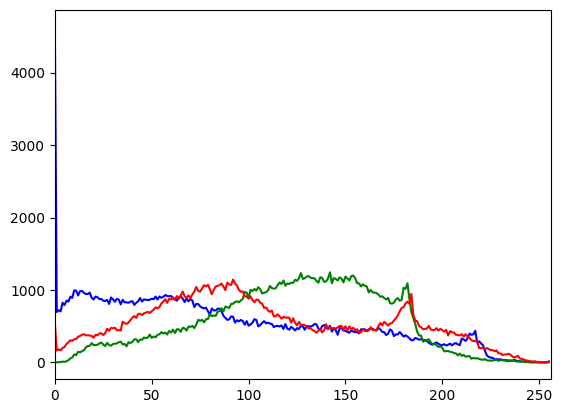

In [115]:
create_histograma(df,1)